# Start Gui

This notebook can be used to start the GUI and test out stuff.

In [1]:
# -*- coding: utf-8 -*-
"""
@author: Fabian Balzer

***
LICENSE:
    Copyright 2021 Fabian Balzer

   Licensed under the Apache License, Version 2.0 (the "License");
   you may not use this file except in compliance with the License.
   You may obtain a copy of the License at

     http://www.apache.org/licenses/LICENSE-2.0

   Unless required by applicable law or agreed to in writing, software
   distributed under the License is distributed on an "AS IS" BASIS,
   WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
   See the License for the specific language governing permissions and
   limitations under the License.
***

Code to open a GUI Dominion randomizer
"""
# %%

import sys
import random_kingdominion as rk
import PyQt5.QtWidgets as QW


def start_program():
    """A function to include everything needed to start the application"""
    # Check whether there is already a running QApplication (e.g. if running
    # from an IDE). This setup prevents crashes for the next run:
    qapp = QW.QApplication.instance()
    if not qapp:
        qapp = QW.QApplication(sys.argv)
    app = rk.UIMainWindow()  # creating the instance
    app.show()
    app.activateWindow()
    qapp.exec_()  # Start the Qt event loop



2024-07-29 19:30:52.149 WARNING streamlit.runtime.caching.cache_data_api: No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.845 "deprecation.showPyplotGlobalUse" is not a valid config option. If you previously had this config option set, it may have been removed.
2024-07-29 19:30:52.845 
  command:

    streamlit run c:\Users\fabia\anaconda3\envs\3_11_Dominion\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-07-29 19:30:52.845 No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.853 No runtime found, using MemoryCacheStorageManager
2024-07-29 19:30:52.853 No runtime found, using MemoryCacheStorageManager


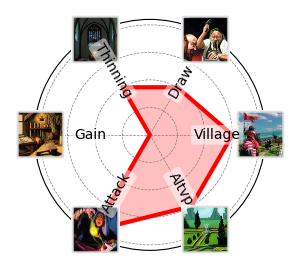

In [2]:

start_program()


In [ ]:
import random_kingdominion as rk
import os
import pandas as pd
from pathlib import Path
import numpy as np


def read_dataframe_from_file(fpath: str | Path, eval_lists=False) -> pd.DataFrame:
    """Read a dataframe"""
    if os.path.isfile(fpath):
        df = pd.read_csv(fpath, sep=";", header=0)
        if eval_lists:
            for colname in df.columns:
                if "type" in colname.lower():
                    # Make sure we properly handle lists
                    df[colname] = df[colname].apply(eval)
    else:
        raise FileNotFoundError(
            2, "Couldn't find the raw card data file, please download it first."
        )
    return df
df = read_dataframe_from_file(rk.FPATH_CARD_DATA, True)
names = rk.ALL_CSOS["Name"].sample(200).values

pd.set_option('display.max_rows', None)
mask = (df["altvp_quality"] > 0)
mask *= ~df["IsOtherThing"]
mask *= ~rk.listlike_contains_any(df["attack_types"], ["Scoring", "Trashing"])
mask *= (df["CardAmount"] != "1") | (df["CardAmount"] == 0)
df[mask][["Cost", "Name", "altvp_quality", "Types", "attack_types", "CardAmount"]].sort_values(["altvp_quality", "Cost"], ascending=[False, True])
# np.sum(mask)
# df["CardAmount"]
# df[["Final Expansion", "Name"]];
# df[df["Expansion"] == "Nocturne"]


,Cost,Name,altvp_quality,Types,attack_types,CardAmount
154,$11,Colony,3,[Victory],[],8*
786,$3*,Castles,3,"[Victory, Castle]",[],8*
133,$5,Collection,3,[Treasure],[],10
309,$5,Distant Lands,3,"[Action, Reserve, Victory]",[],8*
371,$5,Groundskeeper,3,[Action],[],10
145,$6,Goons,3,"[Action, Attack]",[Handsize],10
107,P,Vineyard,3,[Victory],[],8*
43,$3,Great Hall,2,"[Action, Victory]",[],8*
181,$3,Tunnel,2,"[Victory, Reaction]",[],8*
356,$3,Chariot Race,2,[Action],[],10


In [ ]:
# from PyQt5.QtCore import Qt, QStringListModel, QPoint
# from PyQt5.QtGui import QIcon, QStandardItemModel, QPalette, QTextCursor, QTextCharFormat, QCursor
# from PyQt5.QtWidgets import QApplication, QWidget, QHBoxLayout, QLineEdit, QPushButton, QVBoxLayout, QMainWindow, QCompleter, QTextEdit,QLabel, QFrame
# from typing import Sequence
# from random_kingdominion.constants import ALL_CSOS




# class MyMainWindow(QMainWindow):
#     def __init__(self):
#         super().__init__()
#         self.initUI()

#     def initUI(self):
#         # Create a central widget
#         centralWidget = QWidget(self)
#         self.setCentralWidget(centralWidget)

#         # Create a layout for the central widget
#         layout = QVBoxLayout()

#         # Create the ValidatingLineEditWidget
#         self.validatingLineEditWidget = CSVValidationWidget()  # type: ignore
#         layout.addWidget(self.validatingLineEditWidget)
#         self.validatingLineEditWidget.set_allowed_csos(set(ALL_CSOS.Name))

#         # Set the layout for the central widget
#         centralWidget.setLayout(layout)

#         # Set window properties
#         self.setWindowTitle('Main Window with ValidatingLineEditWidget')
#         self.setGeometry(100, 100, 400, 200)

# qapp = QApplication.instance()
# if not qapp:
#     qapp = QApplication(sys.argv)
# app = MyMainWindow()  # creating the instance
# app.show()
# app.activateWindow()
# qapp.exec_()  # Start the Qt event loop


0

In [ ]:
df = rk.ALL_CSOS.copy()
df["word_count"] = df["Text"].apply(lambda x: len(x.split()))
# df = df[df["IsInSupply"]]


In [ ]:
# Find and plot expansion qualities.
exp_quals = {}
for expansion in np.unique(rk.ALL_CSOS["Final Expansion"]):
    sub_df = rk.ALL_CSOS[rk.ALL_CSOS["Final Expansion"] == expansion]
    obj_num = len(sub_df)
    full_qual_dict = {qual: sum(sub_df[f"{qual}_quality"])/obj_num for qual in rk.QUALITIES_AVAILABLE}
    exp_quals[expansion] = full_qual_dict
import matplotlib.pyplot as plt

for exp, vals in exp_quals.items():
    rk.plot_normalized_polygon(data=vals, max_val=1)
    ax = plt.gca()
    ax.set_title(exp)


In [8]:
recsets = rk.KingdomManager()
recsets.load_recommended_kingdoms()
dailies = rk.KingdomManager()
dailies.load_kingdoms_from_yaml(rk.PATH_ASSETS.joinpath("kingdoms/dailies_prelim.yml"))


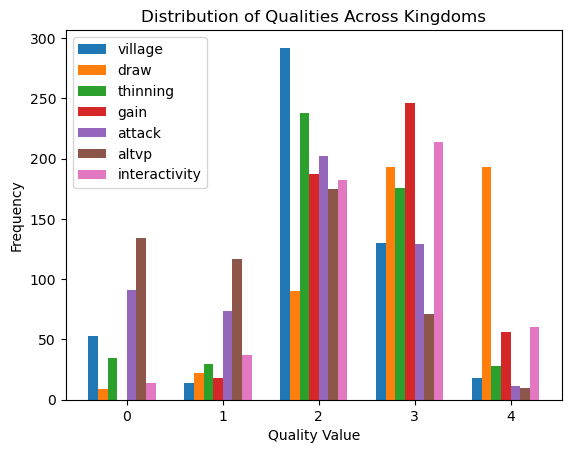

[Kingdom(cards=['bandit', 'bureaucrat', 'chapel', 'harbinger', 'laboratory', 'merchant', 'mine', 'moneylender', 'throne_room', 'vassal'], landscapes=[], expansions=['Base, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='Silver & Gold', notes='', idx=5, total_qualities={'village': 2, 'draw': 2, 'thinning': 3, 'gain': 1, 'attack': 1, 'altvp': 0, 'interactivity': 2}),
 Kingdom(cards=['advisor', 'baker', 'courtyard', 'doctor', 'farm', 'masterpiece', 'nobles', 'plaza', 'replace', 'wishing_well'], landscapes=[], expansions=['Guilds', 'Intrigue, 2E'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='Name That Card', notes='', idx=57, total_qualities={'village': 2, 'draw': 4, 'thinning': 3, 'gain': 1, 'attack': 1, 'altvp': 2, 'interactivity': 2}),
 Kingdom(cards=['cutpurse', 'guildmaster', 'highwayman', 'native_village', 'odyss

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming rk.QUALITIES_AVAILABLE is a list of qualities you want to plot
qualities = rk.QUALITIES_AVAILABLE.copy()


x = np.arange(6)  # Qualities can be in the range [0, 5]

# The frequencies of how often each quality appears in the data
y_data = {}
for qual in qualities:
    occurrences = [rk.Kingdom.from_dict(k).total_qualities[qual] for k in dailies.kingdoms]
    y_data[qual] =np.histogram(occurrences, bins=x)[0]



bar_width = 0.1  # Adjust as needed to fit your data

# Plotting
fig, ax = plt.subplots()
for i, qual in enumerate(qualities):
    # Adjust x positions for each quality
    adjusted_x_positions = x[:-1] + (i * bar_width)-len(qualities)*bar_width/2
    ax.bar(adjusted_x_positions, y_data[qual], width=bar_width, label=qualities[i])


# Add legend to distinguish different qualities
plt.legend()

# Add titles and labels as necessary
plt.title('Distribution of Qualities Across Kingdoms')
plt.xlabel('Quality Value')
plt.ylabel('Frequency')

plt.show()



In [16]:
rk.Kingdom.from_dombot_csv_string("flag bearer, urchin, rats, mountain village, scepter, sculptor, feodum, hermit, ducat, death cart, road network, fair")


Kingdom(cards=['death_cart', 'ducat', 'feodum', 'flag_bearer', 'hermit', 'mountain_village', 'rats', 'scepter', 'sculptor', 'urchin'], landscapes=['fair', 'road_network'], expansions=['Dark Ages', 'Renaissance'], use_colonies=False, use_shelters=False, extras=[], obelisk_pile='', bane_pile='', mouse_card='', druid_boons=[], traits=[], name='', notes='', idx=306893169233807975644182239606701389583, total_qualities={'altvp': 2, 'attack': 2, 'draw': 1, 'gain': 3, 'interactivity': 4, 'thinning': 3, 'village': 2})